In [111]:
import acquire
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [112]:
df = acquire.get_wine()

In [113]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [114]:
for i, j in enumerate df.columns:
    

SyntaxError: invalid syntax (2760904889.py, line 1)

In [ ]:
x = itertools.combinations(df.columns, 3)
y = [' '.join(i) for i in x]

In [ ]:
def train_validate_test(df, target):
    '''
    this function takes in a dataframe and splits it into 3 samples,
    a test, which is 20% of the entire dataframe,
    a validate, which is 24% of the entire dataframe,
    and a train, which is 56% of the entire dataframe.
    It then splits each of the 3 samples into a dataframe with independent variables
    and a series with the dependent, or target variable.
    The function returns 3 dataframes and 3 series:
    X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test.
    '''
    # split df into test (20%) and train_validate (80%)
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    # split train_validate off into train (70% of 80% = 56%) and validate (30% of 80% = 24%)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target, 'type'])
    y_train = train[target]
    # split validate into X (dataframe, drop target) & y (series, keep target only)
    X_validate = validate.drop(columns=[target, 'type'])
    y_validate = validate[target]
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target, 'type'])
    y_test = test[target]
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [ ]:
def train_validate_test_dummy(df, target):
    '''
    this function takes in a dataframe and splits it into 3 samples,
    a test, which is 20% of the entire dataframe,
    a validate, which is 24% of the entire dataframe,
    and a train, which is 56% of the entire dataframe.
    It then splits each of the 3 samples into a dataframe with independent variables
    and a series with the dependent, or target variable.
    The function returns 3 dataframes and 3 series:
    X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test.
    '''
    df_dummies = pd.get_dummies(df.type, drop_first=True)
    # Concatenate the original DataFrame and the dummy variables DataFrame
    df = pd.concat([df, df_dummies], axis=1)
    
    df = df.drop(columns=['type'])
    # split df into test (20%) and train_validate (80%)
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    # split train_validate off into train (70% of 80% = 56%) and validate (30% of 80% = 24%)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target])
    y_train = train[target]
    # split validate into X (dataframe, drop target) & y (series, keep target only)
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target])
    y_test = test[target]
    return X_train, y_train, X_validate, y_validate, X_test, y_test


In [115]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,2_cluster,3_cluster,4_cluster
2138,5.5,0.24,0.32,8.70,0.060,19.0,102.0,0.99400,3.27,0.31,10.4,1,3,3,1
19,7.9,0.32,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,0,0,2,0
601,7.2,0.24,0.40,1.40,0.045,31.0,106.0,0.99140,2.88,0.38,10.8,1,1,3,1
2540,9.0,0.29,0.34,12.10,0.030,34.0,177.0,0.99706,3.13,0.47,10.6,1,3,3,1
501,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,5.1,0.21,0.28,1.40,0.047,48.0,148.0,0.99168,3.50,0.49,10.4,1,3,3,1
1943,6.3,0.25,0.44,11.60,0.041,48.0,195.0,0.99680,3.18,0.52,9.5,1,0,2,2
285,7.3,0.32,0.25,7.20,0.056,47.0,180.0,0.99610,3.08,0.47,8.8,1,0,2,2
607,7.3,0.25,0.29,7.50,0.049,38.0,158.0,0.99650,3.43,0.38,9.6,1,0,2,2


In [116]:
X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test_dummy(df, 'quality')

In [117]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white
2138,5.5,0.24,0.32,8.70,0.060,19.0,102.0,0.99400,3.27,0.31,10.4,1
19,7.9,0.32,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,0
601,7.2,0.24,0.40,1.40,0.045,31.0,106.0,0.99140,2.88,0.38,10.8,1
2540,9.0,0.29,0.34,12.10,0.030,34.0,177.0,0.99706,3.13,0.47,10.6,1
501,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3319,5.1,0.21,0.28,1.40,0.047,48.0,148.0,0.99168,3.50,0.49,10.4,1
1943,6.3,0.25,0.44,11.60,0.041,48.0,195.0,0.99680,3.18,0.52,9.5,1
285,7.3,0.32,0.25,7.20,0.056,47.0,180.0,0.99610,3.08,0.47,8.8,1
607,7.3,0.25,0.29,7.50,0.049,38.0,158.0,0.99650,3.43,0.38,9.6,1


In [118]:
def scale_data(X_train, X_validate, X_test):
    scaler = MinMaxScaler()
    # Note that we only call .fit with the training data,
    # but we use .transform to apply the scaling to all the data splits.
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_validate_scaled = scaler.transform(X_validate)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_validate_scaled, X_test_scaled

X_train_scaled, X_validate_scaled, X_test_scaled = scale_data(X_train, X_validate, X_test)

In [119]:
# # Example list
# col_list = train.drop(columns=['type']).columns
# # Generate all combinations of length 2 from the list
# combinations_list = list(combinations(col_list, 3))
# combinations_list = [list(ele) for ele in combinations_list]
# # Print the result
# print(combinations_list)
# len(combinations_list)

In [120]:
columns = X_train.columns #List of Columns
numbers = [0,1,2,3,4,5,6,7,8,9,10] #List of numbers for the scaled np array I'm converting into a dataframe
zipped= dict(zip(numbers, columns))
X_train_scaled = pd.DataFrame(X_train_scaled).rename(columns=zipped)
X_validate_scaled = pd.DataFrame(X_validate_scaled).rename(columns=zipped)
X_test_scaled = pd.DataFrame(X_test_scaled).rename(columns=zipped)

In [121]:
X_train_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,11
0,0.140496,0.106667,0.192771,0.124233,0.080268,0.062500,0.219400,0.132832,0.417323,0.050562,0.347826,1.0
1,0.338843,0.160000,0.307229,0.018405,0.550167,0.055556,0.113164,0.188741,0.236220,0.483146,0.173913,0.0
2,0.280992,0.106667,0.240964,0.012270,0.055184,0.104167,0.228637,0.082707,0.110236,0.089888,0.405797,1.0
3,0.429752,0.140000,0.204819,0.176380,0.030100,0.114583,0.392610,0.191826,0.307087,0.140449,0.376812,1.0
4,0.545455,0.240000,0.439759,0.091258,0.103679,0.128472,0.159353,0.229227,0.338583,0.353933,0.579710,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3632,0.107438,0.086667,0.168675,0.012270,0.058528,0.163194,0.325635,0.088105,0.598425,0.151685,0.347826,1.0
3633,0.206612,0.113333,0.265060,0.168712,0.048495,0.163194,0.434180,0.186813,0.346457,0.168539,0.217391,1.0
3634,0.289256,0.160000,0.150602,0.101227,0.073579,0.159722,0.399538,0.173318,0.267717,0.140449,0.115942,1.0
3635,0.289256,0.113333,0.174699,0.105828,0.061873,0.128472,0.348730,0.181029,0.543307,0.089888,0.231884,1.0


In [122]:
feature_list = []
for i in range(2,5):
    
    from sklearn.feature_selection import SelectKBest, f_regression

    # parameters: f_regression stats test, give me i features
    f_selector = SelectKBest(f_regression, k=i)

    # find the top 8 X's correlated with y
    f_selector.fit(X_train, y_train)

    # boolean mask of whether the column was selected or not. 
    feature_mask = f_selector.get_support()

    # get list of top K features. 
    f_feature = X_train.iloc[:,feature_mask].columns.tolist()
    
    feature_list.append(f_feature)

    #print features
    print(f_feature)

['density', 'alcohol']
['volatile acidity', 'density', 'alcohol']
['volatile acidity', 'chlorides', 'density', 'alcohol']


In [123]:
X_train_i_features

NameError: name 'X_train_i_features' is not defined

In [124]:
feature_list

[['density', 'alcohol'],
 ['volatile acidity', 'density', 'alcohol'],
 ['volatile acidity', 'chlorides', 'density', 'alcohol']]

In [125]:
X_train_2_features = X_train_scaled[feature_list[0]]
X_train_2_features

,density,alcohol
0,0.132832,0.347826
1,0.188741,0.173913
2,0.082707,0.405797
3,0.191826,0.376812
4,0.229227,0.579710
...,...,...
3632,0.088105,0.347826
3633,0.186813,0.217391
3634,0.173318,0.115942
3635,0.181029,0.231884


In [126]:
X_train_3_features = X_train_scaled[feature_list[1]]
X_train_3_features

,volatile acidity,density,alcohol
0,0.106667,0.132832,0.347826
1,0.160000,0.188741,0.173913
2,0.106667,0.082707,0.405797
3,0.140000,0.191826,0.376812
4,0.240000,0.229227,0.579710
...,...,...,...
3632,0.086667,0.088105,0.347826
3633,0.113333,0.186813,0.217391
3634,0.160000,0.173318,0.115942
3635,0.113333,0.181029,0.231884


In [127]:
X_train_4_features = X_train_scaled[feature_list[2]]
X_train_4_features

,volatile acidity,chlorides,density,alcohol
0,0.106667,0.080268,0.132832,0.347826
1,0.160000,0.550167,0.188741,0.173913
2,0.106667,0.055184,0.082707,0.405797
3,0.140000,0.030100,0.191826,0.376812
4,0.240000,0.103679,0.229227,0.579710
...,...,...,...,...
3632,0.086667,0.058528,0.088105,0.347826
3633,0.113333,0.048495,0.186813,0.217391
3634,0.160000,0.073579,0.173318,0.115942
3635,0.113333,0.061873,0.181029,0.231884


In [128]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train_2_features)

kmeans.predict(X_train_2_features)

array([0, 3, 2, ..., 3, 3, 0], dtype=int32)

In [129]:
X_train['2_cluster'] = kmeans.predict(X_train_2_features)

In [130]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train_3_features)

kmeans.predict(X_train_3_features)

array([0, 1, 0, ..., 1, 1, 0], dtype=int32)

In [131]:
X_train['3_cluster'] = kmeans.predict(X_train_3_features)

In [132]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train_4_features)

kmeans.predict(X_train_4_features)

array([1, 0, 1, ..., 2, 2, 1], dtype=int32)

In [133]:
X_train['4_cluster'] = kmeans.predict(X_train_4_features)

In [134]:
X_train_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,11
0,0.140496,0.106667,0.192771,0.124233,0.080268,0.062500,0.219400,0.132832,0.417323,0.050562,0.347826,1.0
1,0.338843,0.160000,0.307229,0.018405,0.550167,0.055556,0.113164,0.188741,0.236220,0.483146,0.173913,0.0
2,0.280992,0.106667,0.240964,0.012270,0.055184,0.104167,0.228637,0.082707,0.110236,0.089888,0.405797,1.0
3,0.429752,0.140000,0.204819,0.176380,0.030100,0.114583,0.392610,0.191826,0.307087,0.140449,0.376812,1.0
4,0.545455,0.240000,0.439759,0.091258,0.103679,0.128472,0.159353,0.229227,0.338583,0.353933,0.579710,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3632,0.107438,0.086667,0.168675,0.012270,0.058528,0.163194,0.325635,0.088105,0.598425,0.151685,0.347826,1.0
3633,0.206612,0.113333,0.265060,0.168712,0.048495,0.163194,0.434180,0.186813,0.346457,0.168539,0.217391,1.0
3634,0.289256,0.160000,0.150602,0.101227,0.073579,0.159722,0.399538,0.173318,0.267717,0.140449,0.115942,1.0
3635,0.289256,0.113333,0.174699,0.105828,0.061873,0.128472,0.348730,0.181029,0.543307,0.089888,0.231884,1.0


In [135]:
X_train_2 = X_train.drop(columns=['3_cluster', '4_cluster'])

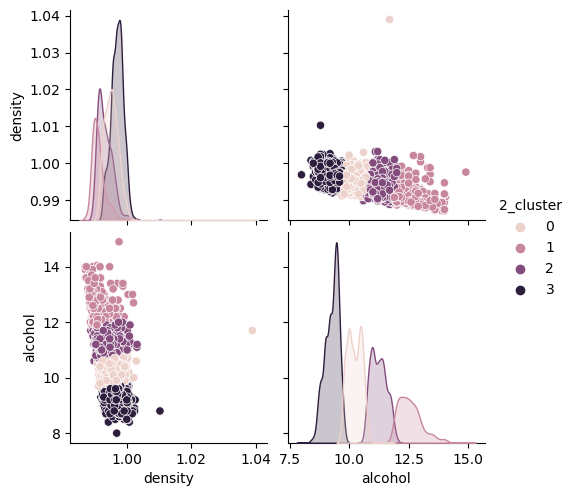

In [136]:
sns.pairplot(X_train_2, x_vars=['density', 'alcohol'], y_vars=['density', 'alcohol'], hue='2_cluster')

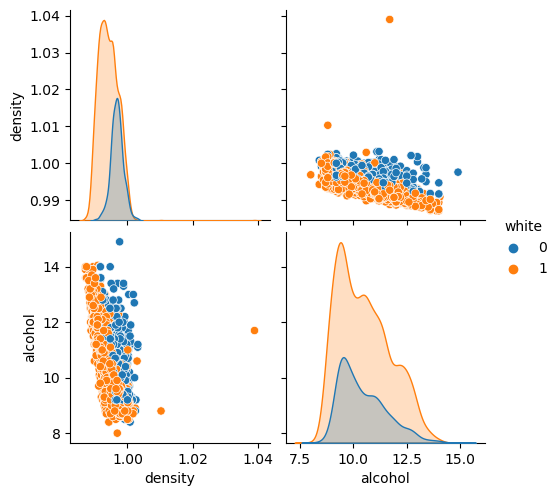

In [137]:
sns.pairplot(X_train_2, x_vars=['density', 'alcohol'], y_vars=['density', 'alcohol'], hue='white')

In [138]:
X_train_3 = X_train.drop(columns=['2_cluster', '4_cluster'])

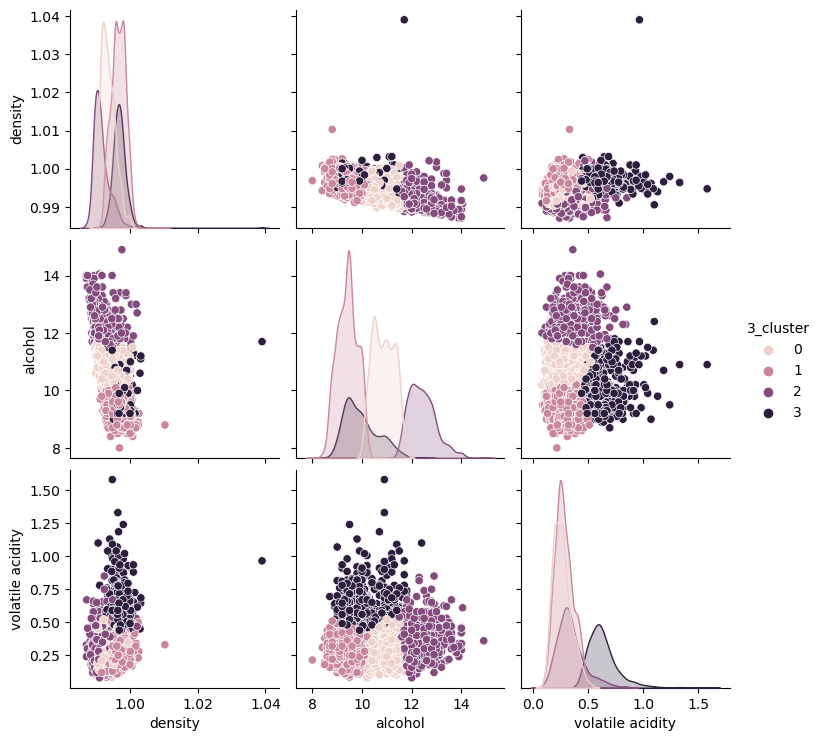

In [139]:
sns.pairplot(X_train_3,  x_vars=['density', 'alcohol', 'volatile acidity'], y_vars=['density', 'alcohol', 'volatile acidity'], hue='3_cluster')

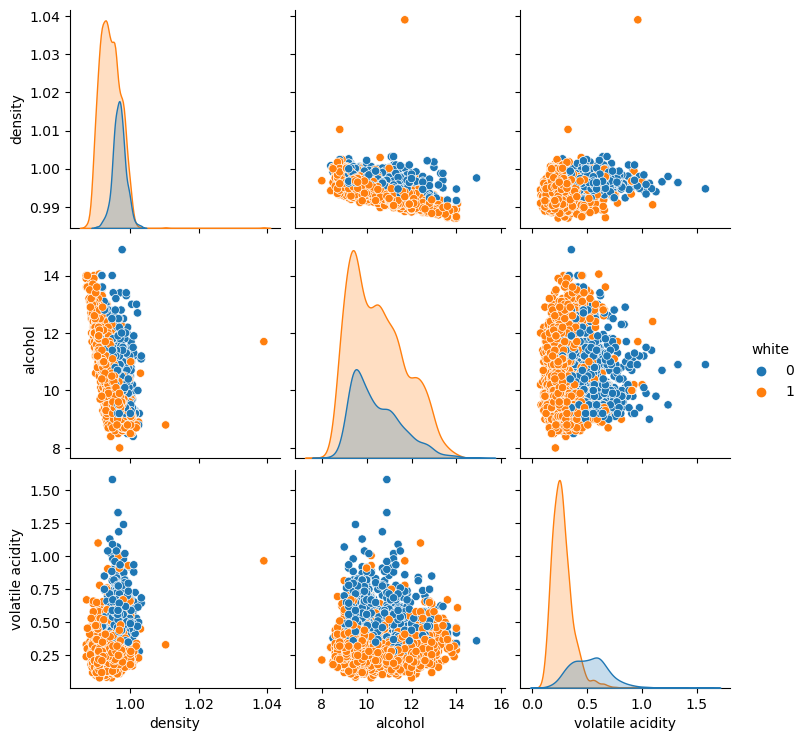

In [140]:
sns.pairplot(X_train_3,  x_vars=['density', 'alcohol', 'volatile acidity'], y_vars=['density', 'alcohol', 'volatile acidity'], hue='white')

In [141]:
X_train_4 = X_train.drop(columns=['2_cluster', '3_cluster'])

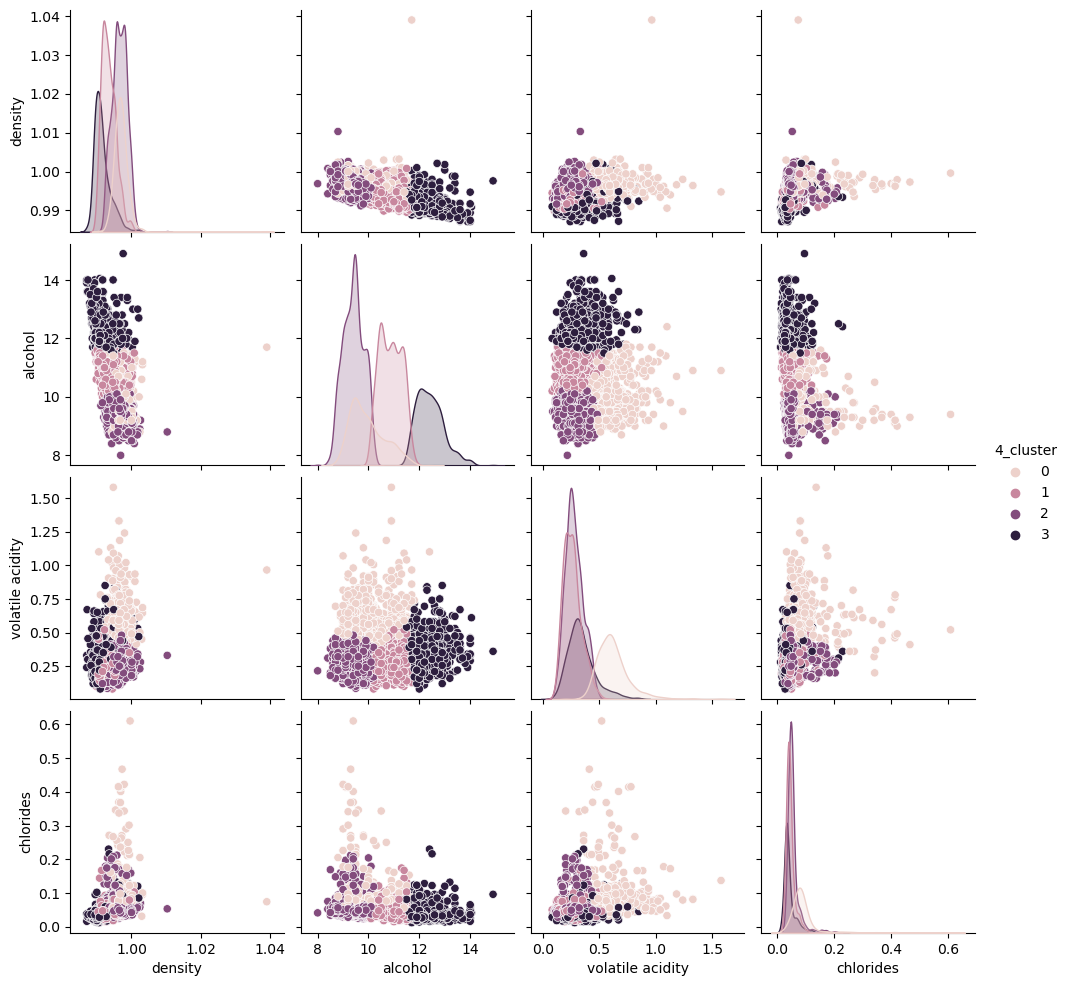

In [142]:
sns.pairplot(X_train_4, x_vars=['density', 'alcohol', 'volatile acidity', 'chlorides'], y_vars=['density', 'alcohol', 'volatile acidity', 'chlorides'], hue='4_cluster')

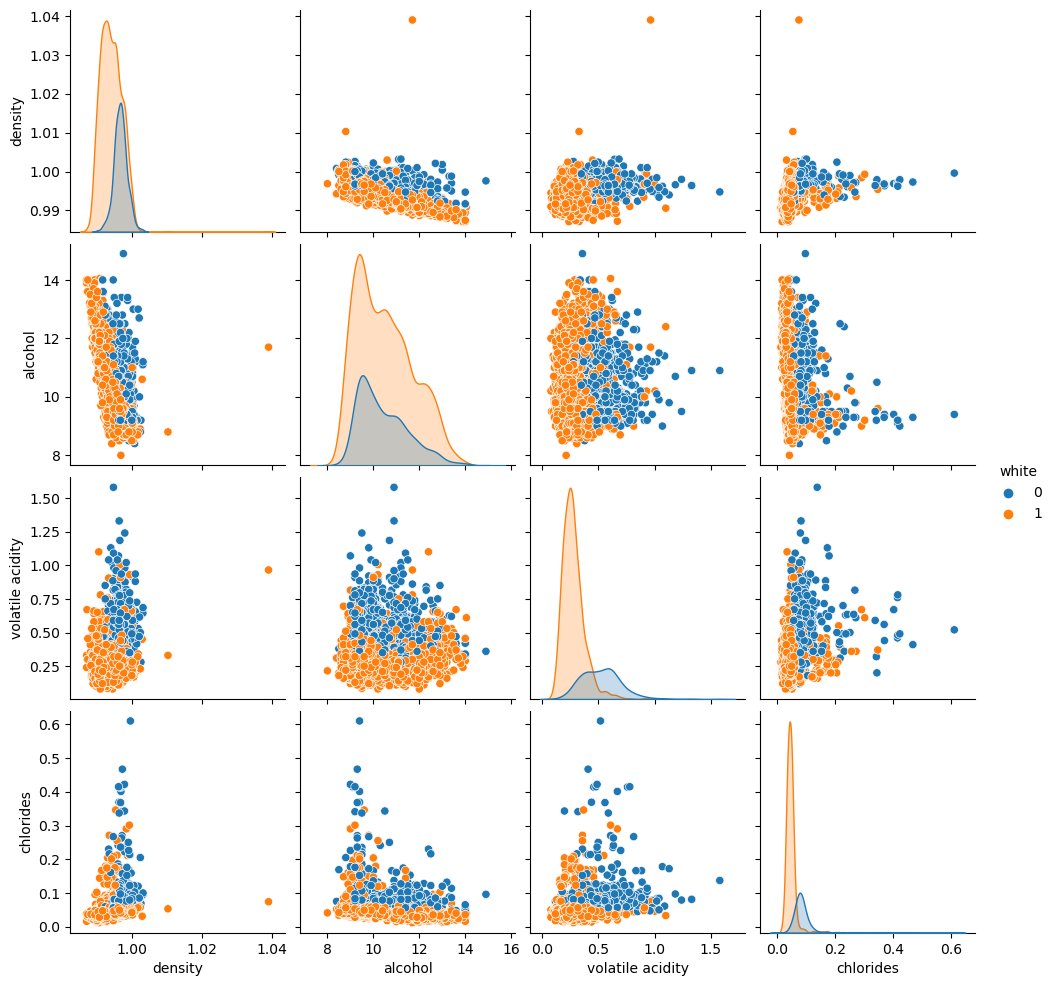

In [143]:
sns.pairplot(X_train_4, x_vars=['density', 'alcohol', 'volatile acidity', 'chlorides'], y_vars=['density', 'alcohol', 'volatile acidity', 'chlorides'], hue='white')

In [152]:
x = pd.Series({k: KMeans(k).fit(X_train_2).inertia_ for k in range(2, 12)})
y = pd.Series({k: KMeans(k).fit(X_train_3).inertia_ for k in range(2, 12)})
z = pd.Series({k: KMeans(k).fit(X_train_4).inertia_ for k in range(2, 12)})
x,y,z

(2     4.962489e+06
 3     2.494810e+06
 4     1.765021e+06
 5     1.402127e+06
 6     1.196131e+06
 7     1.057584e+06
 8     9.460500e+05
 9     8.576022e+05
 10    7.890885e+05
 11    7.258058e+05
 dtype: float64,
 2     4.960887e+06
 3     2.493178e+06
 4     1.763283e+06
 5     1.400598e+06
 6     1.194408e+06
 7     1.055843e+06
 8     9.440534e+05
 9     8.603492e+05
 10    7.881712e+05
 11    7.207078e+05
 dtype: float64,
 2     4.960629e+06
 3     2.492874e+06
 4     1.763066e+06
 5     1.400283e+06
 6     1.194265e+06
 7     1.055604e+06
 8     9.441360e+05
 9     8.558543e+05
 10    7.908965e+05
 11    7.204660e+05
 dtype: float64)

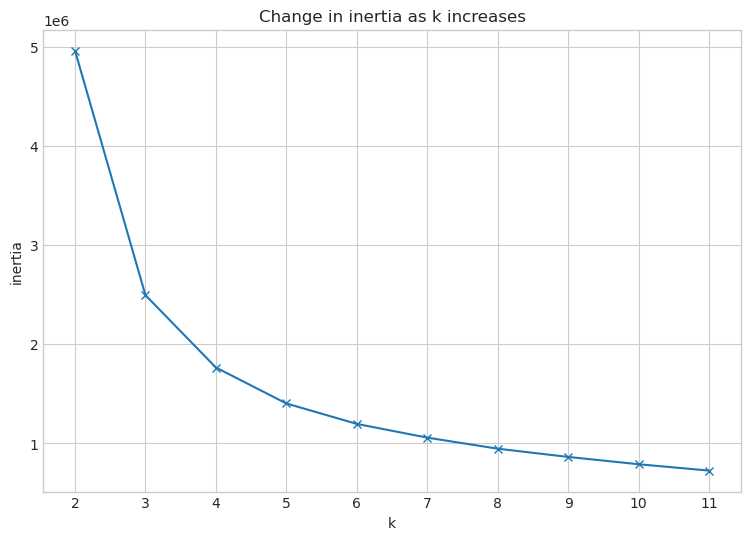

In [154]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_train_2).inertia_ for k in range(2, 12)}).plot(marker='x')
#     pd.Series({k: KMeans(k).fit(X_train_3).inertia_ for k in range(2, 12)}).plot(marker='x')
#     pd.Series({k: KMeans(k).fit(X_train_4).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

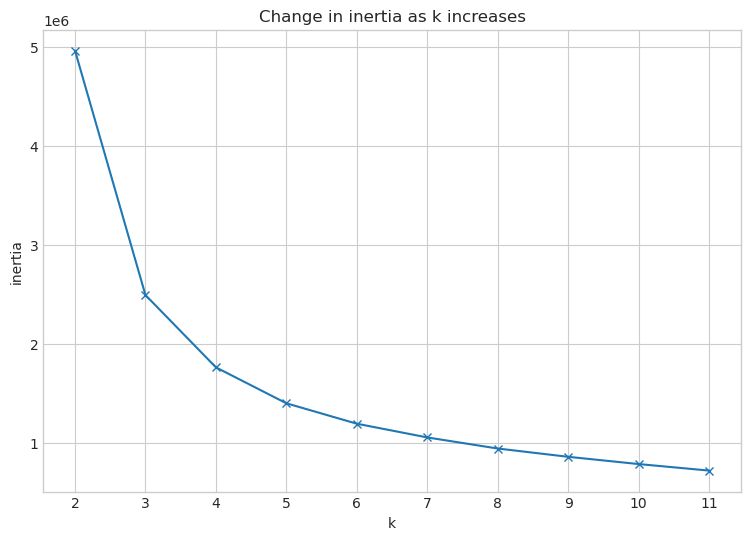

In [146]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_train_3).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

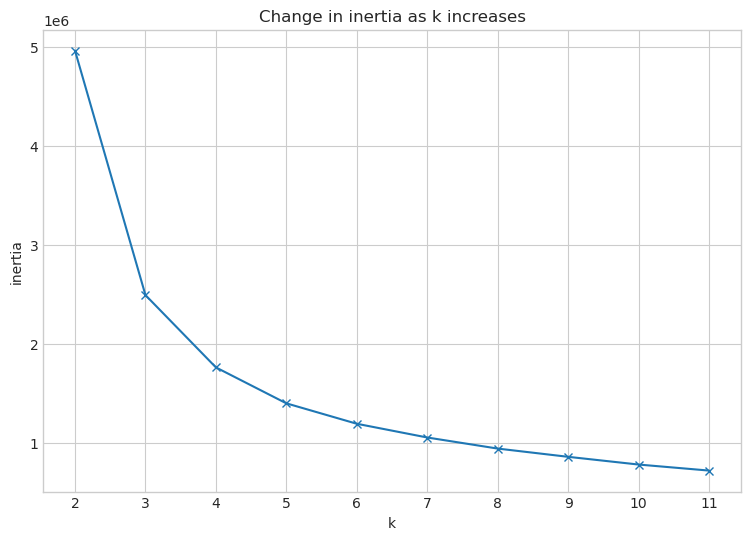

In [147]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_train_4).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [148]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,2_cluster,3_cluster,4_cluster
2138,5.5,0.24,0.32,8.70,0.060,19.0,102.0,0.99400,3.27,0.31,10.4,1,0,0,1
19,7.9,0.32,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,0,3,1,0
601,7.2,0.24,0.40,1.40,0.045,31.0,106.0,0.99140,2.88,0.38,10.8,1,2,0,1
2540,9.0,0.29,0.34,12.10,0.030,34.0,177.0,0.99706,3.13,0.47,10.6,1,0,0,1
501,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,5.1,0.21,0.28,1.40,0.047,48.0,148.0,0.99168,3.50,0.49,10.4,1,0,0,1
1943,6.3,0.25,0.44,11.60,0.041,48.0,195.0,0.99680,3.18,0.52,9.5,1,3,1,2
285,7.3,0.32,0.25,7.20,0.056,47.0,180.0,0.99610,3.08,0.47,8.8,1,3,1,2
607,7.3,0.25,0.29,7.50,0.049,38.0,158.0,0.99650,3.43,0.38,9.6,1,3,1,2
